In [1]:
# 데이터 전처리 , 데이터 증강
import matplotlib.pyplot as plt
from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import ToTensor

In [ ]:
# 데이터셋 불러오기
training_dataset =  CIFAR10(
    root = './',
    train = True,
    download = True,
    transform=ToTensor()
)
test_dataset =  CIFAR10(
    root = './',
    train = False,
    download = True,
    transform=ToTensor()
)  

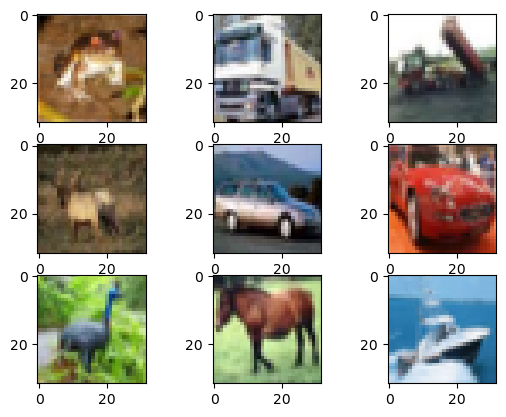

In [15]:
for i in range(9):
    img, label = training_dataset[i]
    plt.subplot(3,3,i+1)
    plt.imshow(img.permute(1,2,0))  #(C,H,W):0 1 2 -- 1 2 0   (H,W,C)
plt.show()  

Files already downloaded and verified
Files already downloaded and verified


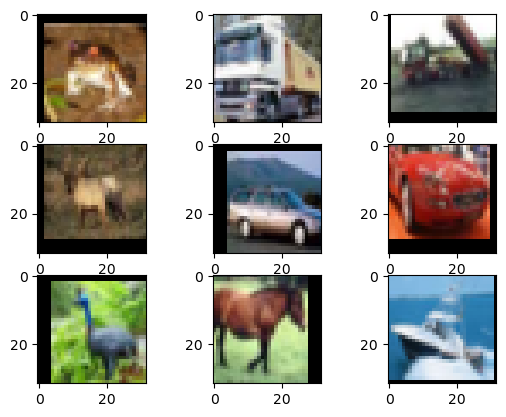

In [ ]:
# 크롭핑과 뒤집기 추가
import torchvision.transforms as T
from torchvision.transforms import Compose
from torchvision.transforms import RandomHorizontalFlip, RandomCrop

transform = Compose([
    T.ToTensor(),
    RandomCrop( (32,32), padding=4),
    RandomHorizontalFlip(p=0.5)
])
training_dataset =  CIFAR10(
    root = './',
    train = True,
    download = True,
    transform=transform
)
test_dataset =  CIFAR10(
    root = './',
    train = False,
    download = True,
    transform=transform
)  
for i in range(9):
    img, label = training_dataset[i]
    plt.subplot(3,3,i+1)
    plt.imshow(img.permute(1,2,0))  #(C,H,W):0 1 2 -- 1 2 0   (H,W,C)
plt.show() 

Files already downloaded and verified
Files already downloaded and verified


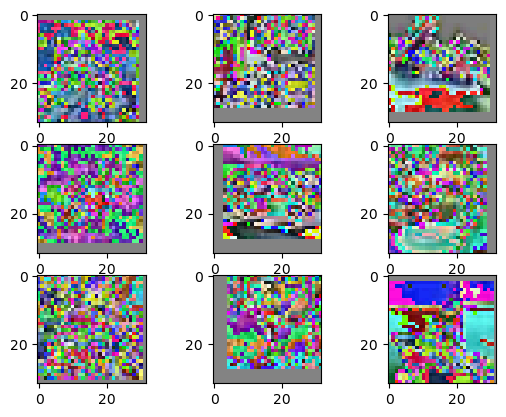

In [22]:
from torchvision.transforms import RandomHorizontalFlip, RandomCrop, Normalize
# 데이터 전처리 에 정규화를 추가
transform = Compose([
    T.ToPILImage(),    
    RandomCrop( (32,32), padding=4),
    RandomHorizontalFlip(p=0.5),
    T.ToTensor(),
    # 데이터 정규화
    Normalize((0.5,0.5,0.5),(0.2,0.2,0.2)),
    T.ToPILImage(),    
])
training_dataset =  CIFAR10(
    root = './',
    train = True,
    download = True,
    transform=transform
)
test_dataset =  CIFAR10(
    root = './',
    train = False,
    download = True,
    transform=transform
)  
for i in range(9):
    # img, label = training_dataset[i]
    plt.subplot(3,3,i+1)
    # plt.imshow(img.permute(1,2,0))  #(C,H,W):0 1 2 -- 1 2 0   (H,W,C)
    plt.imshow(transform(training_dataset.data[i]))
plt.show() 


In [13]:
import torch.nn as nn
class BasicBlock(nn.Module):
    def __init__(self, int_channels, out_channels, hidden_dim):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(int_channels, hidden_dim, kernel_size=3,padding=1)
        self.conv2 = nn.Conv2d(hidden_dim, out_channels,kernel_size=3,padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2)
    def forward(self, x):
        x = self.relu( self.conv1(x) )
        x = self.relu( self.conv2(x) )
        out = self.pool(x)
        return out

In [14]:
import torch
class CNN(nn.Module):
    def __init__(self, num_class):
        super(CNN,self).__init__()
        self.block1 = BasicBlock(3,32,16)  
        self.block2 = BasicBlock(32,128,64)
        self.block3 = BasicBlock(128,256,128)

        # 분류기
        self.fc1 = nn.Linear( 4096, 2048)
        self.fc2 = nn.Linear(2048 , 256)
        self.fc3 = nn.Linear(256 , num_class)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)  #(N,256,4,4)        
        x = torch.flatten(x, start_dim=1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        out = self.fc3(x)
        return out

In [15]:
# 샘플데이터 생성해서 구조 확인
X = torch.randn(4,3,32,32)
model = CNN(10)
model(X)

tensor([[-0.0363,  0.0314, -0.0148, -0.0187,  0.0046,  0.0110,  0.0231,  0.0481,
         -0.0031,  0.0053],
        [-0.0366,  0.0314, -0.0145, -0.0186,  0.0046,  0.0109,  0.0227,  0.0478,
         -0.0025,  0.0056],
        [-0.0364,  0.0316, -0.0148, -0.0190,  0.0047,  0.0107,  0.0229,  0.0476,
         -0.0027,  0.0055],
        [-0.0364,  0.0315, -0.0149, -0.0188,  0.0046,  0.0109,  0.0229,  0.0478,
         -0.0027,  0.0056]], grad_fn=<AddmmBackward0>)

In [35]:
%pip install torchsummary

Note: you may need to restart the kernel to use updated packages.


In [36]:
from torchsummary import summary
model = CNN(10)
summary(model, (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
              ReLU-2           [-1, 64, 32, 32]               0
            Conv2d-3           [-1, 64, 32, 32]          36,928
              ReLU-4           [-1, 64, 32, 32]               0
         MaxPool2d-5           [-1, 64, 16, 16]               0
        BasicBlock-6           [-1, 64, 16, 16]               0
            Conv2d-7          [-1, 128, 16, 16]          73,856
              ReLU-8          [-1, 128, 16, 16]               0
            Conv2d-9          [-1, 128, 16, 16]         147,584
             ReLU-10          [-1, 128, 16, 16]               0
        MaxPool2d-11            [-1, 128, 8, 8]               0
       BasicBlock-12            [-1, 128, 8, 8]               0
           Linear-13                 [-1, 2048]      16,779,264
             ReLU-14                 [-

In [38]:
for name, param in model.named_parameters():
    print(f'{name} {list(param.shape)}')

block1.conv1.weight [64, 3, 3, 3]
block1.conv1.bias [64]
block1.conv2.weight [64, 64, 3, 3]
block1.conv2.bias [64]
block2.conv1.weight [128, 64, 3, 3]
block2.conv1.bias [128]
block2.conv2.weight [128, 128, 3, 3]
block2.conv2.bias [128]
fc1.weight [2048, 8192]
fc1.bias [2048]
fc2.weight [256, 2048]
fc2.bias [256]
fc3.weight [10, 256]
fc3.bias [10]


In [41]:
model

CNN(
  (block1): BasicBlock(
    (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): BasicBlock(
    (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=8192, out_features=2048, bias=True)
  (fc2): Linear(in_features=2048, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
  (relu): ReLU()
)

In [ ]:
# 레이어 접근 가능하고 변경도 가능
# model.fc3 = nn.Linear(in_features=256, out_features=2, bias=True)

Linear(in_features=256, out_features=10, bias=True)

In [9]:
import torchvision.transforms as T
from torchvision.transforms import Compose
from torchvision.transforms import RandomHorizontalFlip, RandomCrop,Normalize
from torch.optim import Adam
from torch.utils.data.dataloader import DataLoader
import matplotlib.pyplot as plt
from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import ToTensor
from tqdm import tqdm
# 데이터 증강
transform = Compose([
    RandomCrop( (32,32), padding=4),
    RandomHorizontalFlip(p=0.5),
    T.ToTensor(),
    # 데이터 정규화
    Normalize((0.5,0.5,0.5),(0.2,0.2,0.2)),    
])
# 데이터 셋
training_dataset =  CIFAR10(root = './',train = True,download = True,transform=transform)
test_dataset =  CIFAR10(root = './',train = False,download = True, transform=transform) 
# 데이터 로더
train_loader = DataLoader(training_dataset, batch_size=256,shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=256,shuffle=False)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = CNN(10)
model.to(device)

lr = 1e-3
optim = Adam(model.parameters(), lr=lr)
epochs = 1
# 학습루프
for epoch in range(epochs):
    for data, label in tqdm(train_loader,desc=f'epoch : {epoch+1}'):
        optim.zero_grad()
        preds = model(data.to(device))
        loss = nn.CrossEntropyLoss()(preds, label.to(device))
        loss.backward()
        optim.step()
    if (epoch+1) % 10 == 0:
        print(f'epoch : {epoch+1}  loss : {loss.item()}')

torch.save(model.state_dict(), 'cifar.pth')

Files already downloaded and verified
Files already downloaded and verified


epoch : 1: 100%|██████████| 196/196 [05:42<00:00,  1.75s/it]


In [17]:
# 평가
model.load_state_dict(torch.load('CIFAR.pth',map_location=device))
# 예측
num_corr = 0
with torch.no_grad():
    for data, label in test_loader:
        output = model(data.to(device))
        preds = output.data.max(1)[1]
        corr = preds.eq(label.to(device).data).sum().item()
        num_corr += corr
    print(f'Accuracy : {num_corr / len(test_dataset)}')


C:\Users\playdata2\AppData\Local\Temp\ipykernel_16332\3456075950.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('CIFAR.pth',map_locatio

RuntimeError: Error(s) in loading state_dict for CNN:
	Missing key(s) in state_dict: "block1.conv1.weight", "block1.conv1.bias", "block1.conv2.weight", "block1.conv2.bias", "block2.conv1.weight", "block2.conv1.bias", "block2.conv2.weight", "block2.conv2.bias", "block3.conv1.weight", "block3.conv1.bias", "block3.conv2.weight", "block3.conv2.bias", "fc1.weight", "fc1.bias", "fc2.weight", "fc2.bias", "fc3.weight", "fc3.bias". 
	Unexpected key(s) in state_dict: "features.0.weight", "features.0.bias", "features.2.weight", "features.2.bias", "features.5.weight", "features.5.bias", "features.7.weight", "features.7.bias", "features.10.weight", "features.10.bias", "features.12.weight", "features.12.bias", "features.14.weight", "features.14.bias", "features.17.weight", "features.17.bias", "features.19.weight", "features.19.bias", "features.21.weight", "features.21.bias", "features.24.weight", "features.24.bias", "features.26.weight", "features.26.bias", "features.28.weight", "features.28.bias", "classifier.0.weight", "classifier.0.bias", "classifier.3.weight", "classifier.3.bias", "classifier.6.weight", "classifier.6.bias". 